<a href="https://colab.research.google.com/github/jbdevnote/start_torch/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch


랭크 : 0 -> 스칼라  
랭크 : 1 -> 벡터  
랭크 : 2 -> 2차원 행렬  
랭크 : 3 -> 3차원 행렬  

In [8]:
x = torch.tensor([[[1,2,3],[4,5,6],[7,8,9]]])

In [9]:
print(x)
print("size : ",x.size())
print("shape : ",x.shape)
print("차원 : ",x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
size :  torch.Size([1, 3, 3])
shape :  torch.Size([1, 3, 3])
차원 :  3


In [10]:
x = x.view(9)
print(x)
print("size : ",x.size())
print("shape : ",x.shape)
print("차원 : ",x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
size :  torch.Size([9])
shape :  torch.Size([9])
차원 :  1


squeeze / unsqueeze / view => 원소 수 그대로 유지하면서 모양과 차원 조절

##텐서 연산과 행렬곱

In [11]:
w = torch.randn(5,3, dtype = torch.float)
x = torch.tensor([[1.0,2.0],[3.0,4.0],[5.0,7.0]])
print('w size : ',w.size())
print('x size : ',x.size())
print('w : ',w)
print('x : ',x)

w size :  torch.Size([5, 3])
x size :  torch.Size([3, 2])
w :  tensor([[-0.2023,  1.4383,  0.7640],
        [ 1.9182, -1.1729,  1.9339],
        [ 0.2545, -1.0371,  0.8355],
        [ 1.0719,  0.2600, -0.5794],
        [ 0.2321, -2.9301, -0.1508]])
x :  tensor([[1., 2.],
        [3., 4.],
        [5., 7.]])


In [12]:
b = torch.randn(5,2, dtype = torch.float)
print('b size : ',b.size())
print('b : ',b)

b size :  torch.Size([5, 2])
b :  tensor([[-0.9477,  0.1416],
        [ 3.0725, -0.6041],
        [ 2.2509,  0.5101],
        [ 0.2912, -0.8316],
        [-1.6908,  0.3386]])


In [13]:
wx = torch.mm(w,x)
print('wx size : ', wx.size())
print('wx : ',wx)

wx size :  torch.Size([5, 2])
wx :  tensor([[  7.9329,  10.6970],
        [  8.0687,  12.6817],
        [  1.3208,   2.2092],
        [ -1.0448,  -0.8716],
        [ -9.3122, -12.3118]])


In [14]:
result = wx+b
print('result size : ',result.size())
print('result : ', result)

result size :  torch.Size([5, 2])
result :  tensor([[  6.9852,  10.8386],
        [ 11.1412,  12.0775],
        [  3.5717,   2.7193],
        [ -0.7536,  -1.7033],
        [-11.0030, -11.9731]])


In [15]:
w = torch.tensor(1.0, requires_grad = True)

In [16]:
a = w*3

In [17]:
l = a**2

In [18]:
l.backward()
print(f'l을 w로 미분한 값은 {w.grad}')

l을 w로 미분한 값은 18.0


##오염이미지

In [48]:
import pickle
import matplotlib.pyplot as plot

In [49]:
broken_image = torch.FloatTensor(pickle.load(open("/content/broken_image_t.p",'rb'),encoding='latin1'))

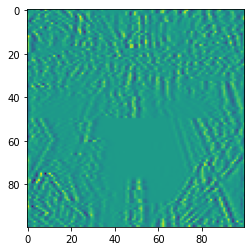

In [50]:
plot.imshow(broken_image.view(100,100))

In [51]:
!pwd

/content


In [23]:
def weird_function(x, n_iter=5):
    h=x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor,h[:-1]),0)
        h_r = torch.cat((h[1:],zero_tensor),0)
        h = filt[0] * h + filt[2] * h_l + filt[1]* h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:],h[:h.shape[0]//2]),0)
    return h

In [52]:
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis,broken_image)

In [53]:
random_tensor = torch.randn(10000, dtype = torch.float)

In [54]:
lr = 0.8

Loss at 0 = 12.363551139831543
Loss at 1000 = 1.1185507774353027
Loss at 2000 = 0.5344409346580505
Loss at 3000 = 0.3737804591655731
Loss at 4000 = 0.2959480881690979
Loss at 5000 = 0.247917041182518
Loss at 6000 = 0.21343916654586792
Loss at 7000 = 0.1860877424478531
Loss at 8000 = 0.16288506984710693
Loss at 9000 = 0.14229705929756165
Loss at 10000 = 0.12346833944320679
Loss at 11000 = 0.10588540881872177
Loss at 12000 = 0.08921939134597778
Loss at 13000 = 0.07324928790330887
Loss at 14000 = 0.057821400463581085
Loss at 15000 = 0.04282834753394127
Loss at 16000 = 0.028195470571517944
Loss at 17000 = 0.021157748997211456
Loss at 18000 = 0.02116623893380165
Loss at 19000 = 0.02116752415895462


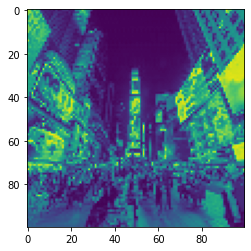

In [55]:
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr * random_tensor.grad
    if i % 1000 == 0:
        print(f'Loss at {i} = {loss.item()}')
plot.imshow(random_tensor.view(100,100).data)

## 신경망 모델 구현하기! 

ex)
입력층 : 감각기관  
입력층을 거친 자극 : 은닉층  
마지막 : 출력층  
각 층에 존재하는 한 단위의 인공뉴런 : 노드

#####가중치(weight)에 행렬곱을 시키고 편향(bias)을 더해줌.

#####이 결과는 활성화 함수(activation function)를 거쳐 결괏값을 산출

#####뒤에서부터 차례대로 조정하고 최적화하는 알고리즘 -> 역전파 알고리즘!!

#####결괏값과 정답을 비교하여 오차를 계산하고 출력층 ~ 입력층까지 경하하강법을 통하여 모두 변경

뒤에서부터 차례대로 조정하고 최적화하는 알고리즘 -> 역전파 알고리즘!!

In [56]:
import numpy
from sklearn.datasets import make_blobs
import torch.nn.functional as F
#import matplotlib.pyplot as plot

In [57]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]],shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]],shuffle=True, cluster_std=0.3)

In [58]:
def label_map(y_, from_, to_):
    y=numpy.copy(y_)
    for f in from_:
        y[y_==f]=to_
    return y

In [59]:
y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

In [60]:
def vis_data(x,y=None, c='r'):
    if y is None:
        y=[None]*len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0],x_[1], '*',makerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0],x_[1],c+'o' if y_==0 else c+'+')

In [62]:
from matplotlib import pyplot as plt

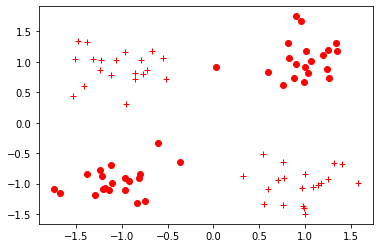

In [63]:
plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

###### 배치 한 번에 오차 한 번 구함!

In [64]:
x_train= torch.FloatTensor(x_train)
x_test= torch.FloatTensor(x_test)
y_train= torch.FloatTensor(y_train)
y_test= torch.FloatTensor(y_test)

In [65]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size,1)
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu=self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [66]:
model = NeuralNet(2,5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000

In [67]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [68]:
model.eval()

NeuralNet(
  (linear_1): Linear(in_features=2, out_features=5, bias=True)
  (relu): ReLU()
  (linear_2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [69]:
test_loss_before = criterion(model(x_test).squeeze(),y_test)
print(f"before training, test loss is {test_loss_before.item()}")

before training, test loss is 0.7811645865440369


In [70]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch %100 ==0:
        print(f'train loss at {epoch} is {train_loss.item()}')
    train_loss.backward()
    optimizer.step()

train loss at 0 is 0.7725133299827576
train loss at 100 is 0.6438748240470886
train loss at 200 is 0.5662875175476074
train loss at 300 is 0.5033410787582397
train loss at 400 is 0.46551451086997986
train loss at 500 is 0.4405215382575989
train loss at 600 is 0.42335614562034607
train loss at 700 is 0.4109896719455719
train loss at 800 is 0.40200987458229065
train loss at 900 is 0.3957453668117523
train loss at 1000 is 0.3905485272407532
train loss at 1100 is 0.3864038586616516
train loss at 1200 is 0.38323304057121277
train loss at 1300 is 0.38080158829689026
train loss at 1400 is 0.3787703514099121
train loss at 1500 is 0.3769983947277069
train loss at 1600 is 0.3754059672355652
train loss at 1700 is 0.37392598390579224
train loss at 1800 is 0.3725322484970093
train loss at 1900 is 0.3712448477745056


In [71]:
model.eval()
test_loss = criterion(model(x_test).squeeze(),y_test)
print(f"after training, test loss is {test_loss.item()}")

after training, test loss is 0.3770850896835327


In [72]:
torch.save(model.state_dict(),'./model.pt')
print('모델 : ',model.state_dict())

모델 :  OrderedDict([('linear_1.weight', tensor([[-1.0393, -0.7272],
        [-1.1767, -0.8806],
        [-1.4615,  0.9147],
        [-1.0680,  0.6795],
        [-1.0094, -0.6787]])), ('linear_1.bias', tensor([-0.3905, -0.5181, -0.4199, -0.3501, -0.3422])), ('linear_2.weight', tensor([[-1.1663, -1.2477,  1.5041,  1.1887, -0.9380]])), ('linear_2.bias', tensor([-0.0119]))])


In [73]:
new_model = NeuralNet(2,5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('백터가 1일 확률은 : ',new_model(torch.FloatTensor([-1,1])).item())

백터가 1일 확률은 :  0.9899674654006958
